# Homework 3

Due 11:59PM Thursday, October 10 submitted via Blackboard



In this homework you will explore a couple of different clustering algorithms and understand the impact of various hyperparameters.

In [2]:
# Imports
import numpy as np
from sklearn.cluster import KMeans
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import AgglomerativeClustering

We'll be using the MNIST digits data because it is easy to understand and visualize.  The code below loads the raw data where each instance is a 28x28 grayscale image represented as a vector of 784 integers between 0 and 255.

It also loads the digits (0-9) to which each image corresponds.  

# Task 0: Get the data

https://courses.cs.umbc.edu/graduate/678/fall24/mnist_labels.txt
https://courses.cs.umbc.edu/graduate/678/fall24/mnist_data.txt

Put the two files above in the same directory as this notebook.

In [3]:
X = [np.array(list(map(int, x.split()))) for x in open('mnist_data.txt').readlines()]
y = [int(y.strip()) for y in open('mnist_labels.txt').readlines()]

In [4]:
# Check to ensure that X and y are the same length
print(len(X))
print(len(y))

10000
10000


In [5]:
def plot_digit(digit):
    "Visualize a digit or a cluster centroid"

    plt.imshow(digit.reshape((28,28)), cmap='gray')
    plt.show()

The digit is 4


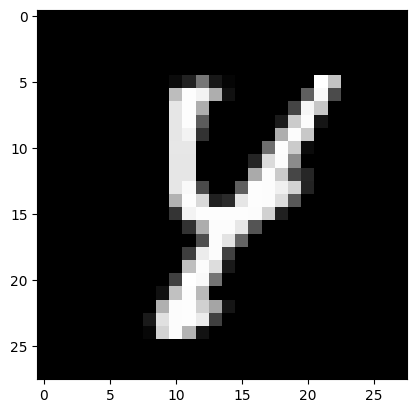

In [6]:
# You can run this cell multiple times to see different digit examples
idx = random.randrange(len(X))
print("The digit is %d" % y[idx])
plot_digit(X[idx])

# Task 1: Get familiar with running k-means

Read through the code below because you'll be using the ideas here for the next task

In [7]:
# Create a KMeans object with 5 clusters and random point selection
# for cluster initialization

clst = KMeans(n_clusters = 5, init = 'random')

In [8]:
# Cluster the data
clst.fit(X)

KMeans(init='random', n_clusters=5)

In [9]:
def get_cm(clst, y):
    """
    Given a cluster object that has been fit and the true labels for the data
    return a confusion matrix where cell (i, j) is the number of times true
    class label j occurs in cluster i.
    """

    cm = np.zeros((np.unique(clst.labels_).shape[0], np.unique(y).shape[0]))

    for ypred, ytrue in zip(clst.labels_, y):
        cm[ypred][ytrue] += 1

    return cm

In [10]:
def plot_cm(cm):
    "Plot a confusion matrix"

    s = sns.heatmap(cm, cmap="GnBu", annot=True, fmt='g')
    s.set(xlabel='Digit', ylabel='Cluster')
    return s

In [11]:
# Get the confusion matrix for the 10 cluster case
cm = get_cm(clst, y)

It's hard to tell what you'll see below due to randomness, but typically there is one cluster with almost all of the 0's.  Find the row for which the 0 column has a very high count.  There is also typically a column that has most of the 1's.  The 4's, 7's, and 8's tend to clump into one cluster.  Look for the row that has high counts for those columns.

<Axes: xlabel='Digit', ylabel='Cluster'>

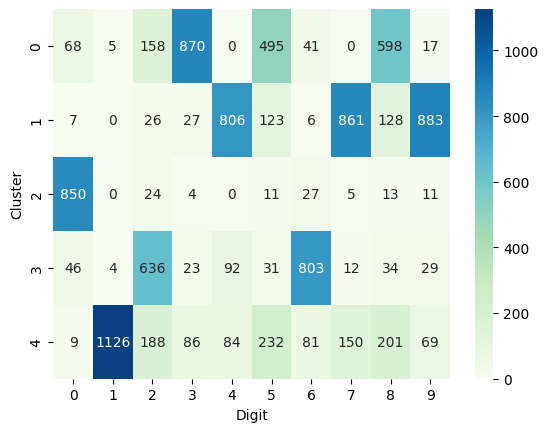

In [12]:
plot_cm(cm)

Cluster ID 0 centroid


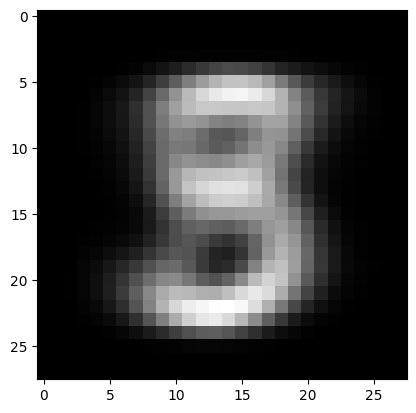

Cluster ID 1 centroid


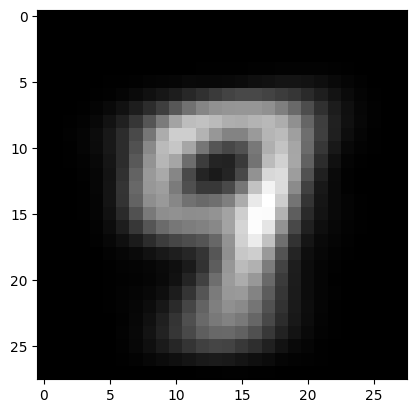

Cluster ID 2 centroid


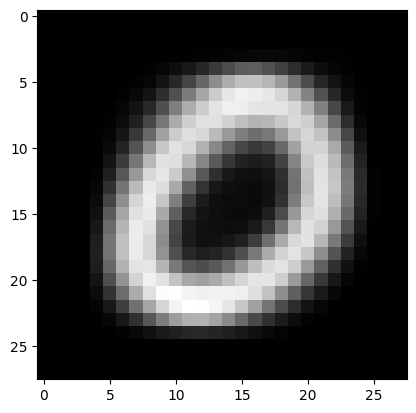

Cluster ID 3 centroid


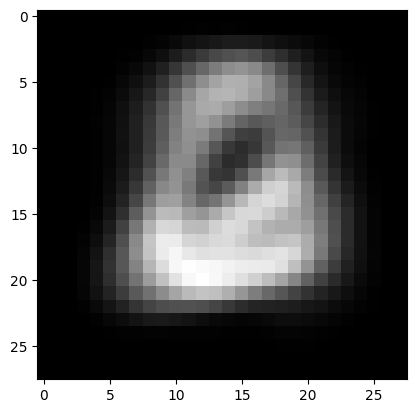

Cluster ID 4 centroid


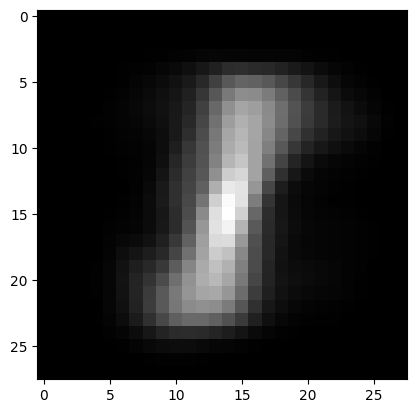

In [13]:
# Look at the centroids for all of the clusters
for i in range(len(clst.cluster_centers_)):
    print("Cluster ID %d centroid" % i)
    plot_digit(clst.cluster_centers_[i])

# Task 2: Varying k in k-Means

For values of k in {2, 10, 15}
* cluster the digits
* print the confusion matrices
* plot the cluster centroids

Note that for k = 2, 2-means must combine distinct digits.  For k = 10 you would hope that it has a cluster for each digit in which that digit is by far the most common.  For k = 15 the expectation is that there may be clusters, for example, for the same digit but different ways of writing it (e.g., 9 with a straight bottom vs. 9 with a curled tail at the bottom).

For each of the three cases, write a couple of paragraphs on what you observe about the way k-means has clustered the data, why it has done it that way (e.g., certain digits are visually similar, be sure to say which ones and why), and why the cluster centroids look the way they do.  You don't have to talk about all of the clusters, especially in the k = 15 case, but you do need to mention several of them in each case.

Confusion Matrix for k = 2


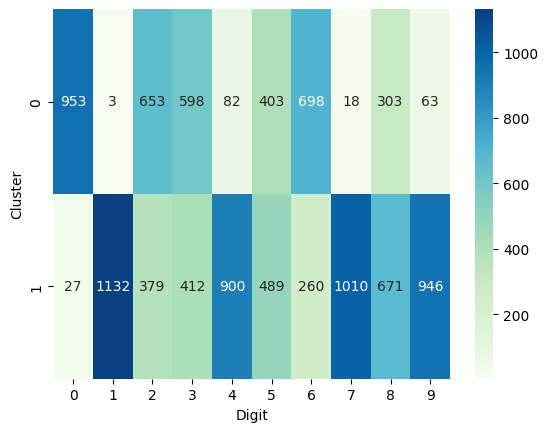

Cluster Centroids for k = 2:
Cluster ID 0 centroid


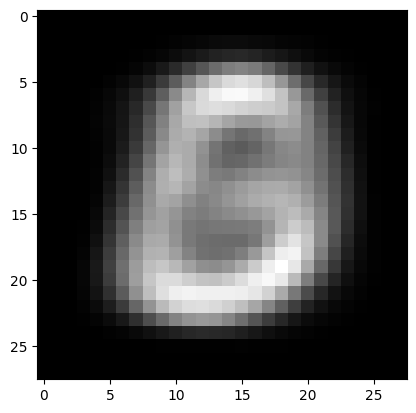

Cluster ID 1 centroid


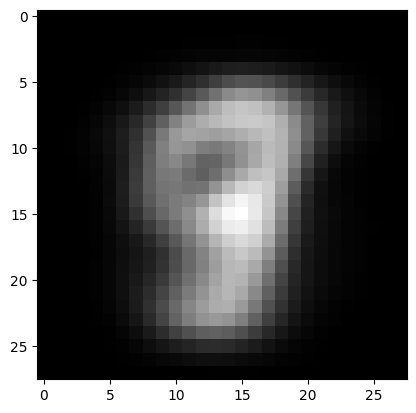

Confusion Matrix for k = 10


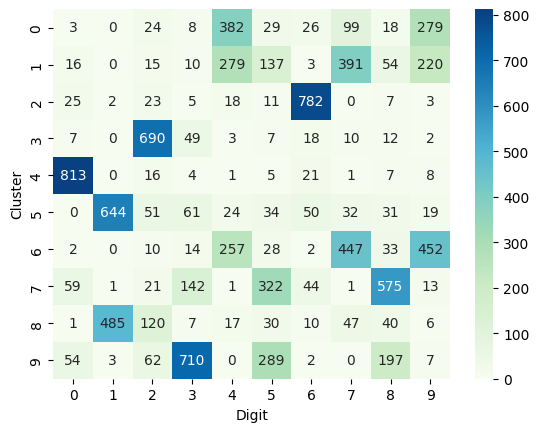

Cluster Centroids for k = 10:
Cluster ID 0 centroid


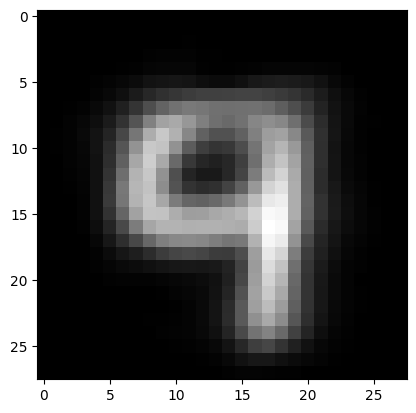

Cluster ID 1 centroid


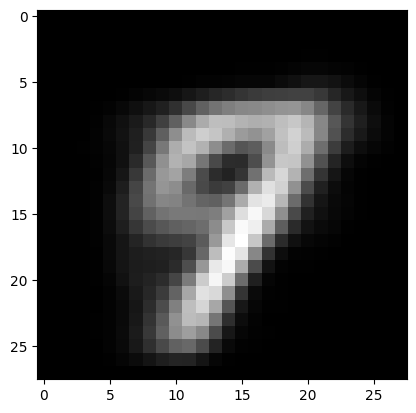

Cluster ID 2 centroid


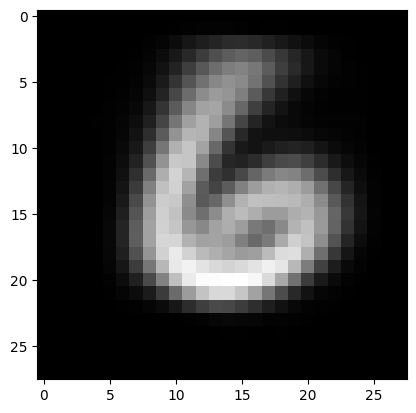

Cluster ID 3 centroid


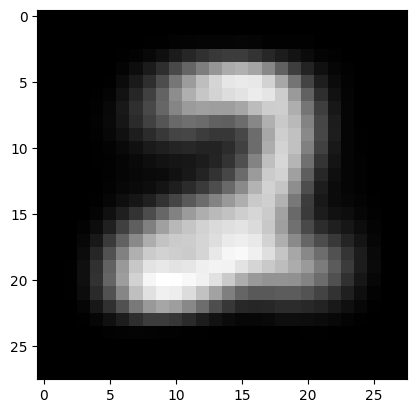

Cluster ID 4 centroid


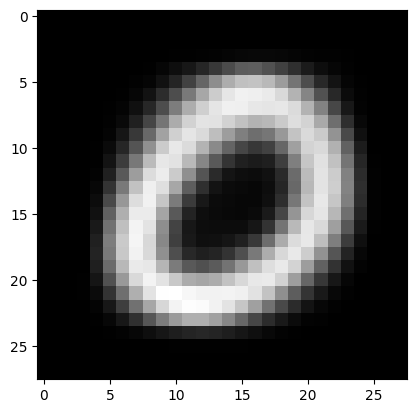

Cluster ID 5 centroid


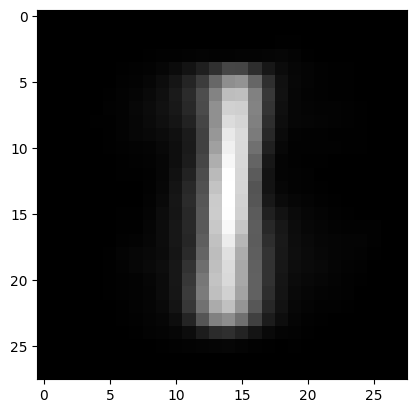

Cluster ID 6 centroid


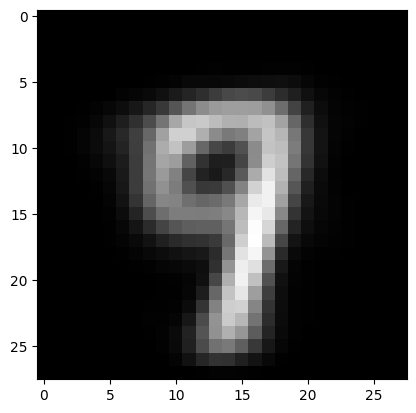

Cluster ID 7 centroid


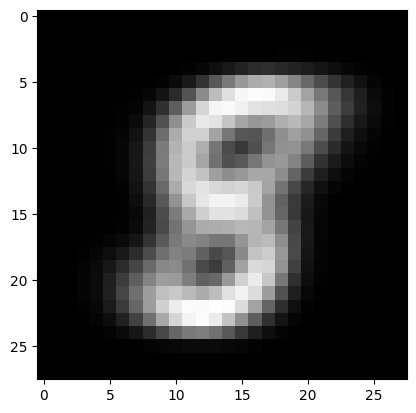

Cluster ID 8 centroid


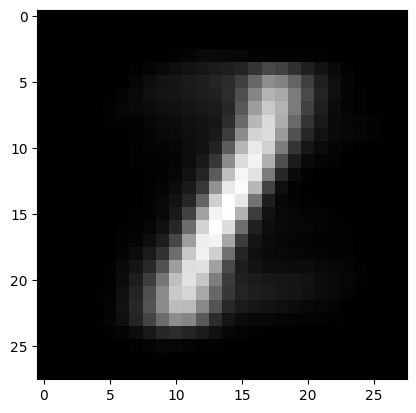

Cluster ID 9 centroid


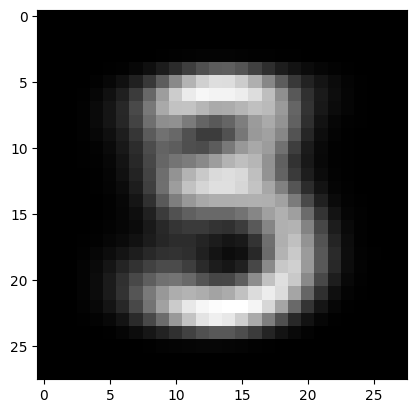

Confusion Matrix for k = 15


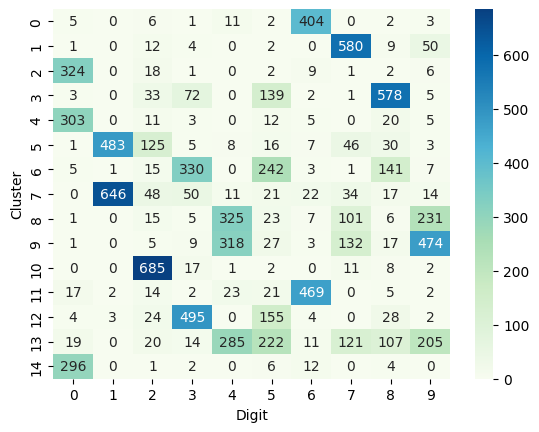

Cluster Centroids for k = 15:
Cluster ID 0 centroid


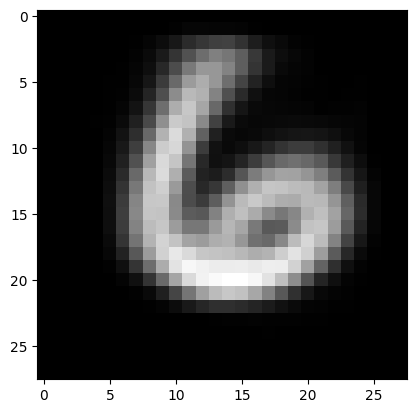

Cluster ID 1 centroid


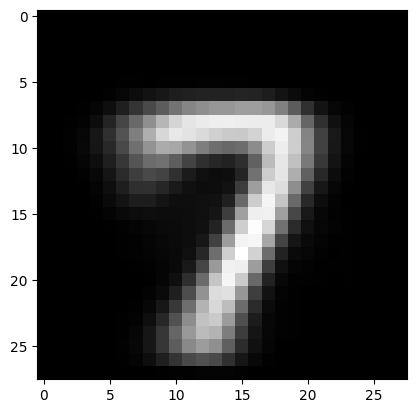

Cluster ID 2 centroid


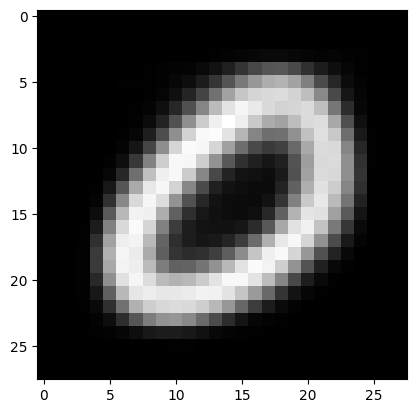

Cluster ID 3 centroid


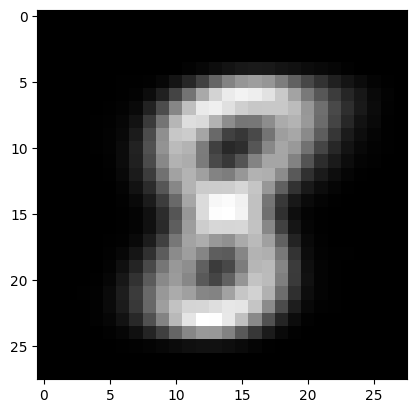

Cluster ID 4 centroid


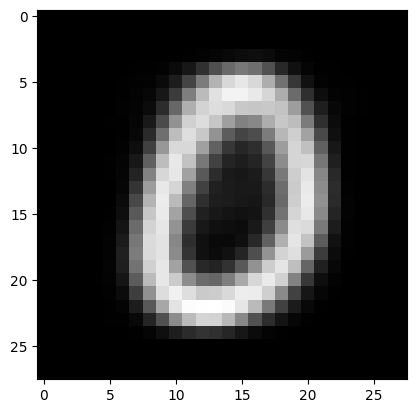

Cluster ID 5 centroid


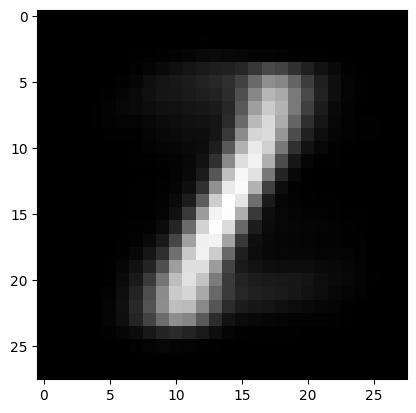

Cluster ID 6 centroid


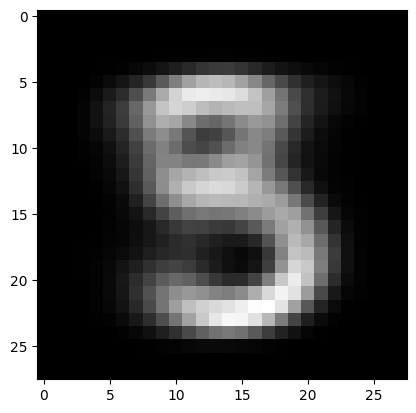

Cluster ID 7 centroid


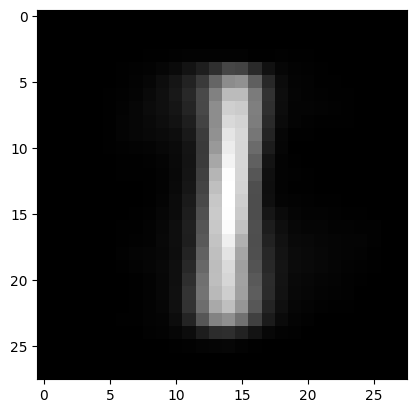

Cluster ID 8 centroid


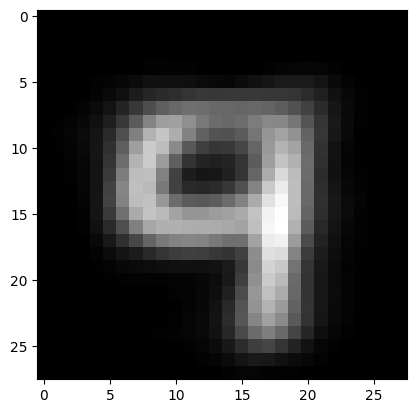

Cluster ID 9 centroid


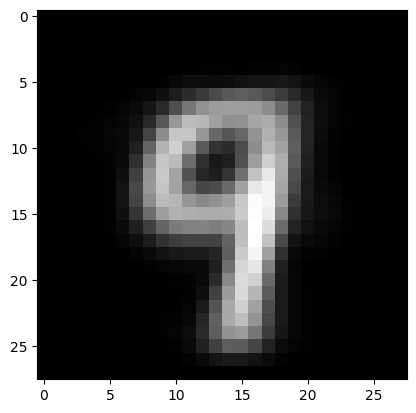

Cluster ID 10 centroid


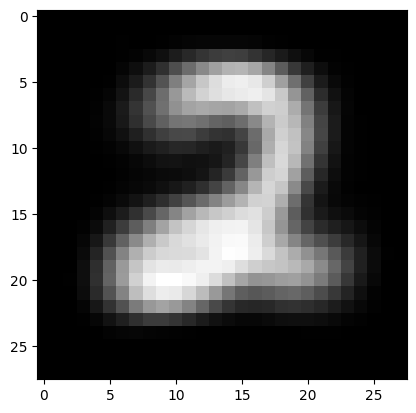

Cluster ID 11 centroid


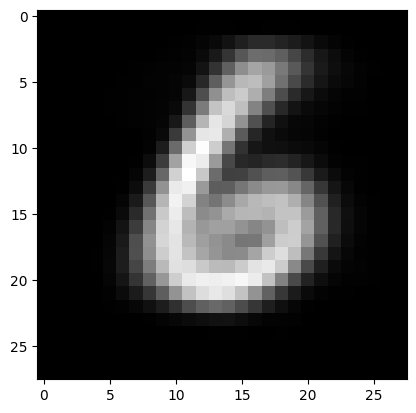

Cluster ID 12 centroid


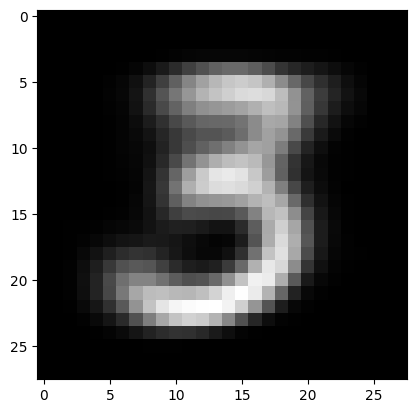

Cluster ID 13 centroid


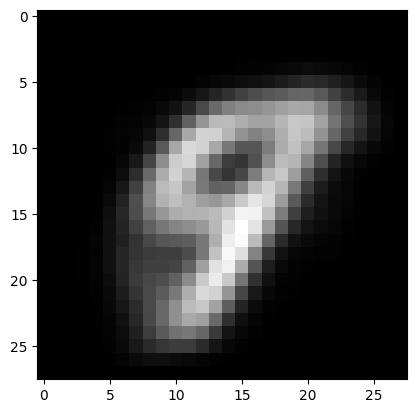

Cluster ID 14 centroid


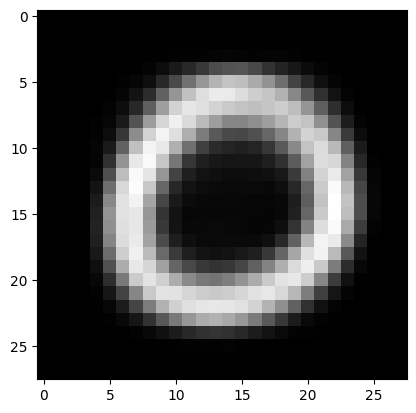

In [14]:
K = [2, 10, 15]
clst = []
for i in K:
  clst_n = KMeans(n_clusters = i, init = 'random')
  clst_n.fit(X)
  clst.append(clst_n)
  cm = get_cm(clst_n, y)
  print("Confusion Matrix for k = %d" % i)
  plot_cm(cm)
  plt.show()

  print(f"Cluster Centroids for k = {i}:")
  for j in range(i):
     print("Cluster ID %d centroid" % j)
     plot_digit(clst_n.cluster_centers_[j])


**<h3>On analyzing the k-means clusters for k = 2, 10 and 15:</h3>**

**<h5>For Cluster Size = 2</h5>**

When there are only 2 clusters, the algorithm combines the similar looking digits into 1 cluster and seperates them from another cluster which again contains similar looking digits which visually differ from the digits in the first cluster.

**<h7>For the 1st Cluster</h7>**
For the first cluster o/r cluster id 0, the algorithm combines most digits labeled as 0 and 6, as well as few of the digits labeled as 2, 3 and 5 together. These digits when handwritten may have a similar visual structure with round shapes and hence are clustered together. Also the centroid for this cluster is the average of all the digits in the cluster, so it looks like a blurry round image.

**<h7>For the 2nd Cluster</h7>**
For the 2nd cluster o/r cluster id 1, the algorithm combines most digits labeled as 1, 4, 7 and 9, as well as few of the digits labeled as 2, 3, 5 and 8  together. These digits when handwritten may have a similar visual structure with linear shape and hence are clustered together. Also the centroid for this cluster is the average of all the digits in the cluster, so it looks like a mix of lines and curves, and has a little of the features of all the digits that are combined in a single cluster.

**<h5>For Cluster Size = 10</h5>**

When there are 10 clusters, the algorithm should ideally classify each digit into its own cluster. Which can be observed in the heatmap above to some extent. However, digits that look similar are sometimes misclassified due to their similar pixel pattern and are sometime clustered together. The centroids for k = 10 usaully look like individual digits. These images are slightly blurred because different handwriting styles for these digits are averaged to obtain the centroid for each cluster. Also, when the clusters have different digits which looks somewhat similar, the centroid will look like a blend of those digits.

**<h7>For the 1st Cluster</h7>**
For the 1st cluster o/r cluster id 0, the algorithm combines mostly digits labeled as 4 and 9 together. These digits have somewhat similar visual structure, which is a combination of linear shape and a little curved structure, so they are clustered together. Also the centroid for this cluster looks like a combination of characterstics of 4 and 9.

Cluster 2 with cluster id 1, also combines 4 and 9 along with 7, which can be explained by the same reasoning as for the 1st cluster. Same is the case with cluster 7 o/r cluster id 6.

Cluster 8 with cluster id 7, combines 3, 5 and 8, which can be explained by the same reasoning as for the 1st cluster, which is that they all have similar visual structure with 2 curves, one on top of the other, hence they are clustered together. Same is the case with cluster 10 o/r cluster id 9.

**<h7>For the 3rd Cluster</h7>**
For the 3rd cluster o/r cluster id 2, the algorithm combines most of the digits labeled as 6 together, with very little misclassification for any other digits. Which means that it has combined most of the similar looking digits together, that is, the algorithm has performed very well for thus cluster. Also the centroid looks pretty much like a 6, average of all the diigts in that cluster.

Cluster 4 with id 3, does something similar to the 3rd cluster and combines most of the digits labeled as 2 together, and this can be explained by the same reasoning as the 3rd cluster. Same is the case with cluster 5 with id 4, which combines the digits labeled as 0, cluster 6 with id 5, which combines the digits labeled as 1 and cluster 9 with id 8, which combines the digits labeled as 1.

**<h5>For Cluster Size = 15</h5>**

When there are 15 clusters the algorithm tries to cluster the same digits into different clusters based on different writing styles. When there are more clusters than the labels, the algorithm focuses on minute differences in the visual structure for same digits. For example, 0 when written can be an oval shape or more of a circular shape, which are classified into different clusters as shown by centroids above. The centroids highlights these differences in the writing styles. Sometimes these extra clusters may also lead to misclassification of a few digits, and combine similar looking digits together.

Cluster ids 2, 4 and 14 combines different ways of writing zero in different cluster, and this difference in the writing styles is clearly visible in the centroids for these clusters. We can observe something similar in clusters 5 and 7, which clusters the different styles of writing  digit 1 into 2 different clusters, clusters 0 and 11, which clusters the different styles of writing  digit 6 into 2 different clusters, and something similar can be observed in some other clusters.

It can also be observed in clusters 8 and 13, that if diffrent digits sometimes look similar then they are combined into a single cluster, as digits 4, 7 and 9 are combined in same cluster. And the centroid shows the average of the characterstics of these different digits.


# Task 3: Agglomerative Clustering

Read the scikit documentation on Agglomerative Clustering.  There are two important hyperparameters:
* linkage, which can take on values ‘ward’, ‘complete’, ‘average’, ‘single’
* metric, which can take on values “euclidean”, “l1”, “l2”, “manhattan”, “cosine”

Explore combinations of those hyperparameters with n_clusters = 10 and see how close you can get to the ideal of one majority digit per cluster.  
* Write a couple of paragraphs explaining what you tried, what worked and what didn't with example confusion matrices.  Include an explanation of **why** you think the best results were a result of the hyperparameters chosen in that case.  Note that you may need to dig through the scikit documentation or use the internet to get more information on their effects.

Confusion Matrix for linkage = ward, metric = euclidean:


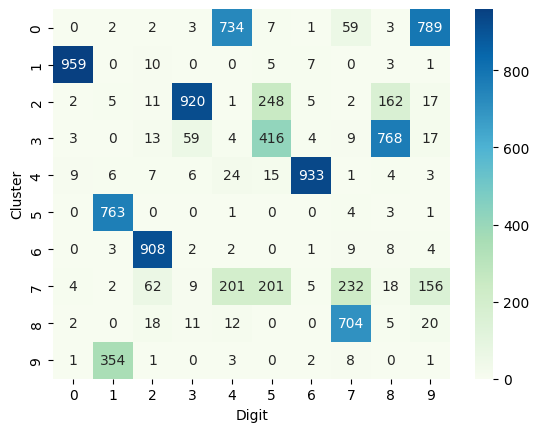

Confusion Matrix for linkage = complete, metric = euclidean:


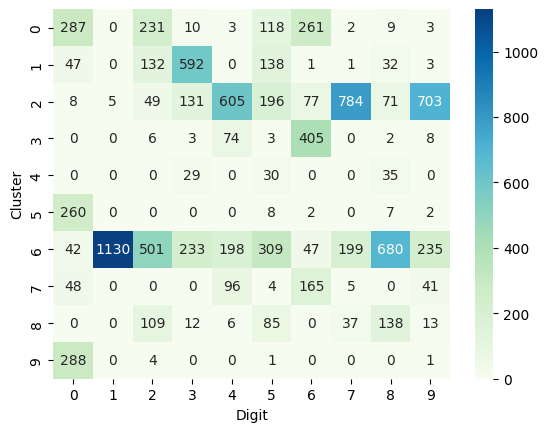

Confusion Matrix for linkage = complete, metric = l1:


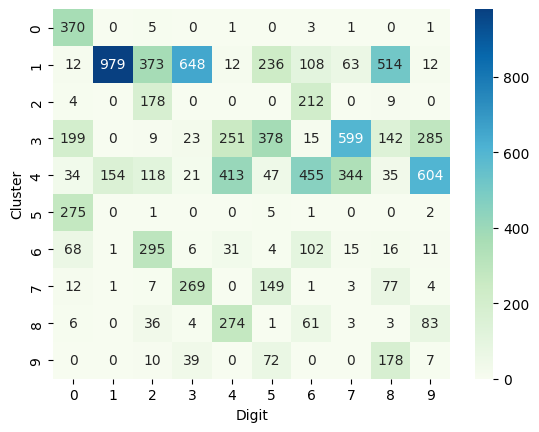

Confusion Matrix for linkage = complete, metric = l2:


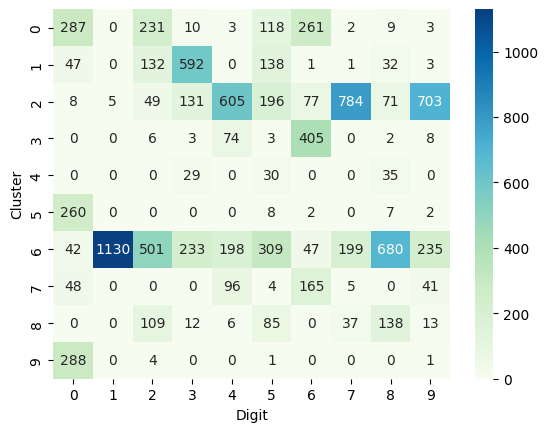

Confusion Matrix for linkage = complete, metric = manhattan:


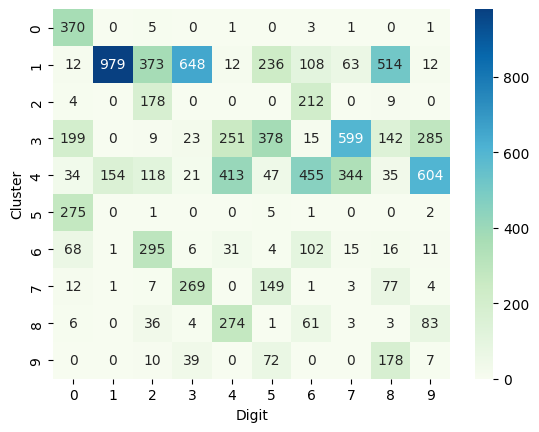

Confusion Matrix for linkage = complete, metric = cosine:


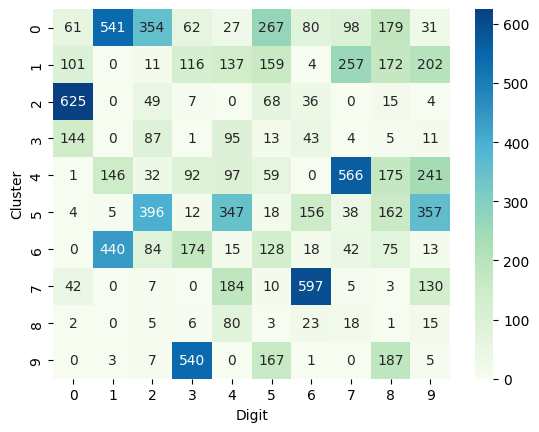

Confusion Matrix for linkage = average, metric = euclidean:


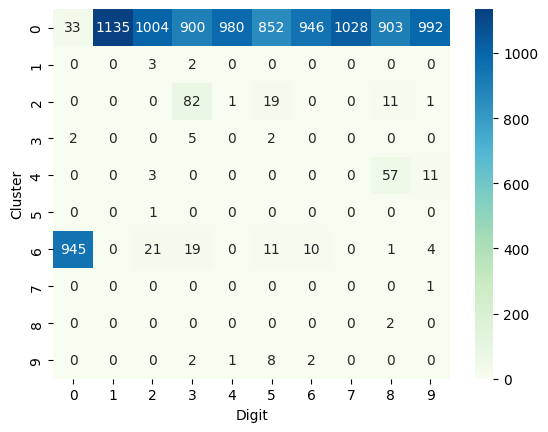

Confusion Matrix for linkage = average, metric = l1:


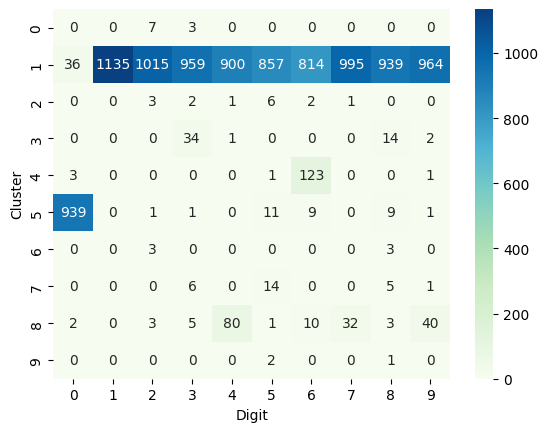

Confusion Matrix for linkage = average, metric = l2:


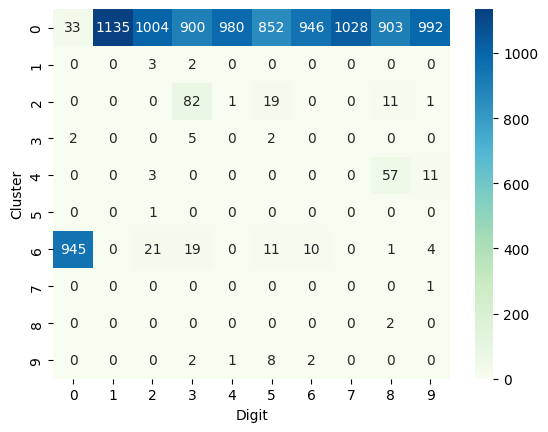

Confusion Matrix for linkage = average, metric = manhattan:


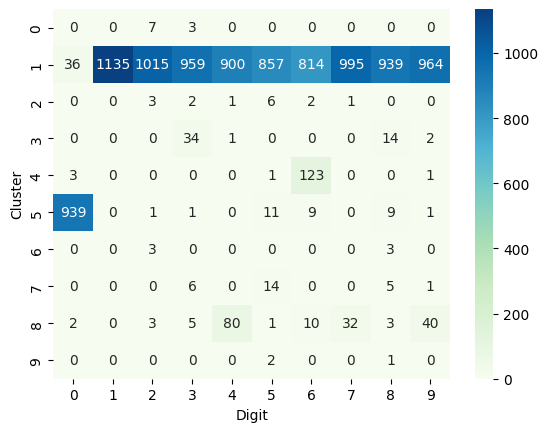

Confusion Matrix for linkage = average, metric = cosine:


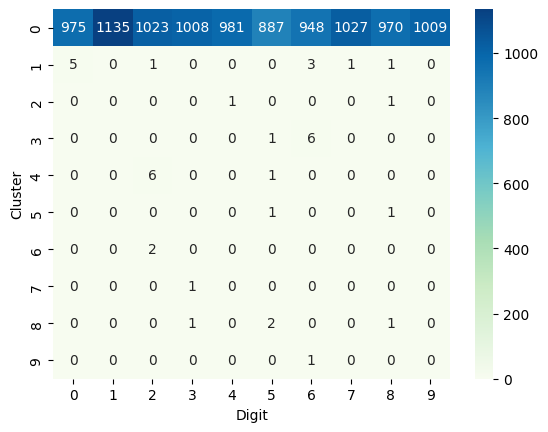

Confusion Matrix for linkage = single, metric = euclidean:


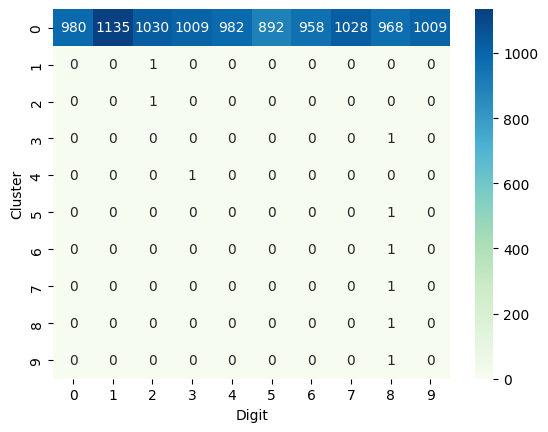

Confusion Matrix for linkage = single, metric = l1:


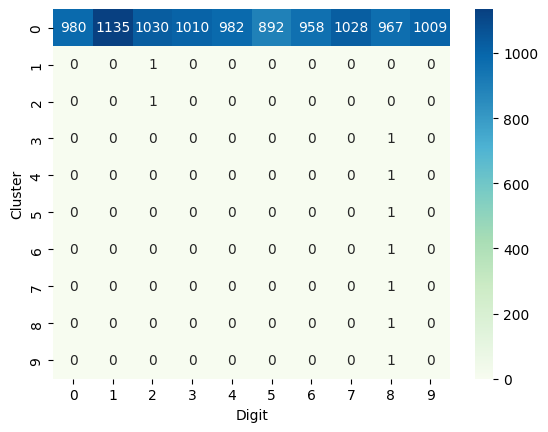

Confusion Matrix for linkage = single, metric = l2:


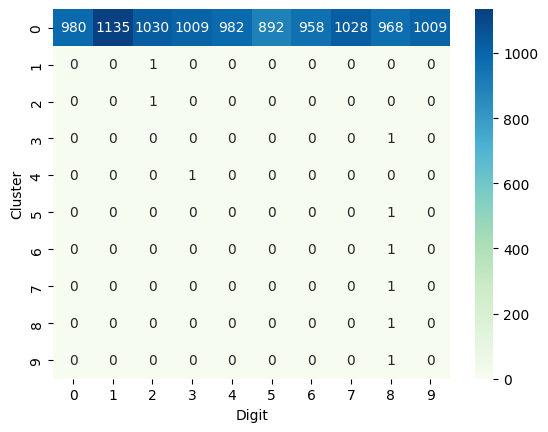

Confusion Matrix for linkage = single, metric = manhattan:


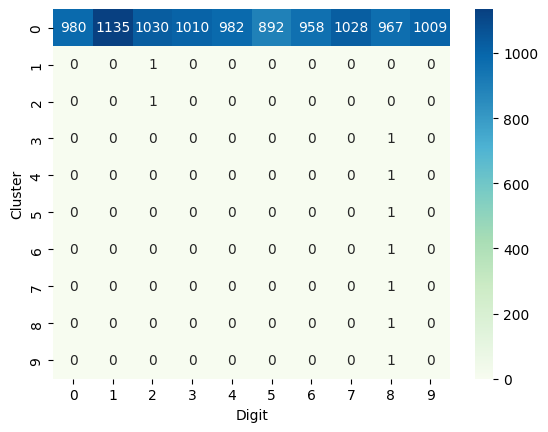

Confusion Matrix for linkage = single, metric = cosine:


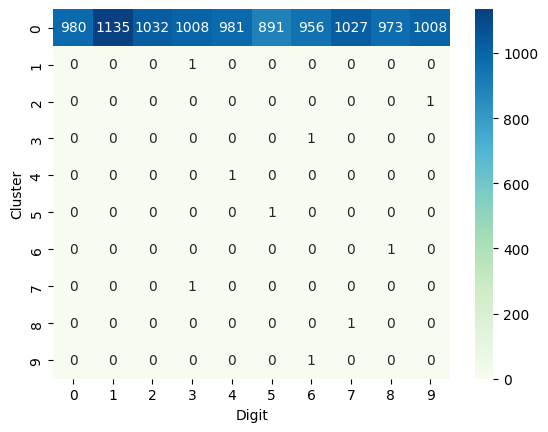

In [15]:
linkages = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

for linkage in linkages:
    for metric in metrics:
       # If linkage is “ward”, only “euclidean” is accepted
       if linkage == 'ward' and metric != 'euclidean':
            continue

       clst = AgglomerativeClustering(n_clusters=10, linkage=linkage, metric=metric)
       clst.fit(X)
       cm = get_cm(clst, y)
       print(f"Confusion Matrix for linkage = {linkage}, metric = {metric}:")
       plot_cm(cm)
       plt.show()


After looking at multiple combinations for linkage and metric hyperparameters for Agglomerative Clustering with 10 as the cluster size, where ideally the algorithm should make clusters in such a way that each cluster majorly represents a single digit. However, the heatmaps above portrays a different picture. Ward linkage with Euclidean metric gives the best result, it has combined almost all the different digits into different clusters and the similar digits into same cluster with minimal misclassification, which is to be expected as a few handwritten digits may look similar to other digits. This could be because, ward linkage minimizes the variance within clusters, which leads to more compact and well-separated groups. Also, euclidean metric captures the spatial relationships between pixels effectively.

Different combinations of metric with complete linkage did not perform as well as the combination of ward and euclidean, but often resulted in clusters with more mixed digit representations, this could be because, these linkages consider the maximum or average distance between points in clusters, which can be influenced by outliers or less distinct digit shapes.

Average and single linkage with all the combination of metric has performed by far the worse. All of these combinations have combined almost all the digits into a single cluster showing that the algorithm hasn't learned much. This may be because, single and average linkage considers only the minimum distance between points, making it susceptible to noise and outliers.
